# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. Σύστημα συστάσεων βασισμένο στο περιεχόμενο - σημασιολογική απεικόνιση δεδομένων με χρήση SOM 

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [1]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_38ba68786cf84e1cbb5cc80f5a49fbed(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_e83bb2ed70e300a3a681580fec6a7d42c6cd8eb2','domain': {'id': 'dd180082cfbb4aba93677ea2bbc9d7ff'},
            'password': 'y]333V2!.D=?Blh='}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_38ba68786cf84e1cbb5cc80f5a49fbed('DefaultProjectankynotpankygmailcom', 'movieDBe.csv'), sep='\t',  header=None, quoting=3)
df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_38ba68786cf84e1cbb5cc80f5a49fbed('DefaultProjectankynotpankygmailcom', 'seedb.csv'),  header=None)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών ως εξής: κάθε ομάδα μπορεί να βρει [εδώ](https://goo.gl/4TuDcA) τον μοναδικό  αριθμό της `team_seed_number` από 1 έως 99. Το data frame `df_data_2` έχει 100 γραμμές και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. Στο επόμενο μπλοκ αλλάξτε τη μεταβλητή `team_seed_number` με τον αριθμό της ομάδας σας και τρέξτε τον κώδικα.

In [2]:
import numpy as np
# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 22
my_index = df_data_2.iloc[team_seed_number,:].values
titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=100` θα γράψουμε `print corpus[100]`.

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="50%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# interesting parameters max_df, min_df, max_features, norm, sublinear_tf, smooth_idf
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.01, sublinear_tf=True, smooth_idf=True, max_features=1000)
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

print 'OK'

OK


In [4]:
from sklearn.metrics.pairwise import cosine_similarity as cs

def content_recommender(target_movie, max_recommendations):
    cos_sim = np.zeros(5000)
    for ind in range(0, corpus_tf_idf.shape[0]):
        cos_sim[ind] = cs(corpus_tf_idf[target_movie], corpus_tf_idf[ind])
    categ = ''
    for cat in categories[target_movie]:
        categ += cat
    print '*** Target movie %d ***\nTitle: %s\nSummary: %s\nGenres: %s\n*** %d most related movies based on content ***' % (target_movie, (titles[target_movie])[0], corpus[target_movie], categ, max_recommendations)
    
    no = 1
    recommendations = np.argsort(-cos_sim)[1:max_recommendations+1]
    for id in recommendations:
        categ = ''
        for cat in categories[id]:
            categ += cat
        print '*** Recommended movie No. %d ***\nMovie ID: %d\nTitle: %s\nSummary: %s\nGenres: %s' % (no, id, (titles[id])[0], corpus[id], categ)
        no += 1

In [21]:
for i in [1, 13, 363, 600, 987, 1000, 1205, 2352, 2505, 3000]:
    content_recommender(i, 4)
    print '\n \n'

*** Target movie 1 ***
Title: Pakeezah
Summary: This movie is about the tawaif Sahibjaan, , who is born to a courtesan, Nargis . After being spurned by her lover Shahabuddin's  family, Nargis is driven to a graveyard where she gives birth to Sahibjaan secretly. Nargis dies during childbirth and her sister, Nawabjaan, takes the child as her own. Sahibjaan was brought up by brothel madame Nawabjaan . Unable to break away from the vicious circle, Sahibjaan grows up and becomes a beautiful and popular dancer/singer. Forest ranger Salim Ahmed Khan  is enthralled by Sahibjaan's beauty and innocence, and eventually convinces her to elope with him, which she does. But trials and tribulations await Sahibjaan as she is recognized by men wherever she goes in the company of Salim. When Salim renames her Pakeezah  and takes her to a priest to be legally married, she refuses, and returns to the brothel. Salim eventually decides to marry someone else, and invites Sahibjaan to dance at his wedding Sah

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ δεν είναι βελτιστοποιημένη. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν δραματική επίδραση στην ποιότητα των συστάσεων και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη διαστατικότητα των δεδομένων. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους χρόνους εκπαίδευσης, ιδιαίτερα στη δεύτερη εφαρμογή.

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται.

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (4, 5 ή και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης `content_recommender(529,3)`.

## Διαδιασία Βελτιστοποίησης
Αρχικά παρατηρήσαμε ότι με sublinear scaling παρατηρούμε καλύτερα αποτελέσματα προτάσεων. Έπειτα για την αποφυγή απειρισμών στα βάρη κάποιων λέξεων, κάναμε smoothing στις εμφανίσεις των λέξεων και παρατηρήσαμε ότι δεν χρειάζονται όλες οι λέξεις που εξάγονται ως χαρακτηριστικά οπότε περιορίσαμε τα χαρακτηριστικά σε 1000. Τέλος για την αποφυγή τοποθέτησης βάρους σε λέξεις που υπάρχουν συνήθως σε summaries λόγω της ίδια της γλώσσας όπως the, an etc. δεν υπολογίζονται σαν features λέξεις με εμφάνιση μεγαλύτερη του 90%. Επίσης λέξεις όπως ονόματα που εμφανίζονται σπάνια ή μοναδικές φορές έπρεπε να απορριφθούν, άρα ορίσαμε να απορρίπτονται αυτές που εμφανίζονται λιγότερο από 1%.

## Αναφορά αποτελεσμάτων
Οι ταινίες με ID: 1, 13, 363, 600, 987, 1000, 1205, 2352, 2505, 3000 έδειξαν να έχουν καλά αποτελέσματα.
1. Για την 1η ταινία προτάθηκαν ταινίες που όλες είχανε σχέση με struggles των πρωταγωνιστών με τις οικογένειες τους.
13. Για την 2η ταινία προτάθηκαν ταινίες με τσακωμούς μεταξύ ζευγαριών.
363. Για την 3η ταινία προτάθηκαν ταινίες Horror.
600. Για την 4η ταινία προτάθηκαν ρομαντικές ταινίες.
987. Για την 5η ταινία προτάθηκαν ταινίες θεματικές του Bolywood, που αφορούσαν οικογενειακά θέματα.
1000. Για την 6η ταινία προτάθηκαν ταινίες γυρισμένες γύρω από μαθητές/φοιτητές.
1205. Για την 7η ταινία προτάθηκαν ταινίες ρομαντικού περιεχομένου.
2352. Για την 8η ταινία προτάθηκαν γιαπωνέζικες ταινίες, συγκεκριμένα animations, καθώς ήταν anime.
2502. Για την 9η ταινία προτάθηκαν ταινίες σχετικά με την φυλακή και παρανομίες.
3000. Για την 10η ταινία προτάθηκαν ταινίες Horror που αφορούσαν κάποιες την φύση.

## &spades; Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
from sklearn.externals import joblib  
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα. Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [32]:
from sklearn.externals import joblib
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 

['corpus_tf_idf.pkl']

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [ ]:
!ls

# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM
<img src="http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width="35%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` ως επιπλέον στήλες (χαρακτηριστικά). Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [24]:
def build_final_set(doc_limit = 5000):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    return final_set

In [25]:
final_set = build_final_set(5000)

Μπορείτε να εξετάστε αργότερα αν περαιτέρω προεπεξεργασία του `final_set` έχει επίδραση στην ποιότητα του χάρτη SOM και του clustering.

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Πρόκειται για μια σύγχρονη και βελτιστοποιημένη υλοποίηση των SOM, παραλληλοποιημένη για CPU και GPU. Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [26]:
# install somoclu
!pip install somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.

## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.

## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.

## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.

## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα νευρώνα (μη βελτιστοποιημένος χάρτης):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
    
## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.


## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.

Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.

# Τελική παράδοση άσκησης

- Θα παραδώσετε στο mycourses το παρόν notebook επεξεργασμένο με τις απαντήσεις σας (μπορείτε να κάνετε ένα αντίγραφο) για τα ζητούμενα και των δύο εφαρμογών. Προσέξτε να απαντήσετε σε όλα τα σημεία όπου απαιτείται.
- Μαζί Θα παραδώσετε τα joblib dumps των τελικών `corpus_tf_idf.pkl` και `som.pkl` (μεγάλος χάρτης - 5000 ταινίες) που θα χρησιμοποιήσετε.  
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στο dump του χάρτη που θα μας παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας.  
- Οδηγίες για την αποθήκευση των dumps θα βρείτε στο FAQ. 
- Μην ξεχάσετε στο τέλος ένα κελί markdown με τα στοιχεία της ομάδας σας.
- Και τα τρία αρχεία πρέπει να βρίσκονται σε ένα zip (ο χάρτης συμπιέζεται πολύ).

In [27]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=100)

In [28]:
# Train SOM
map1 = somoclu.Somoclu(30, 30, maptype='planar')
map1.train(final_set, epochs=100)

In [57]:
# Get BMUs
map1 = joblib.load('map3.pkl')
map2 = map1.get_surface_state()
bmus = map1.get_bmus(map2)

In [58]:
joblib.dump(map1, 'map3.pkl')
# Cluster original map
map1.cluster(alg)

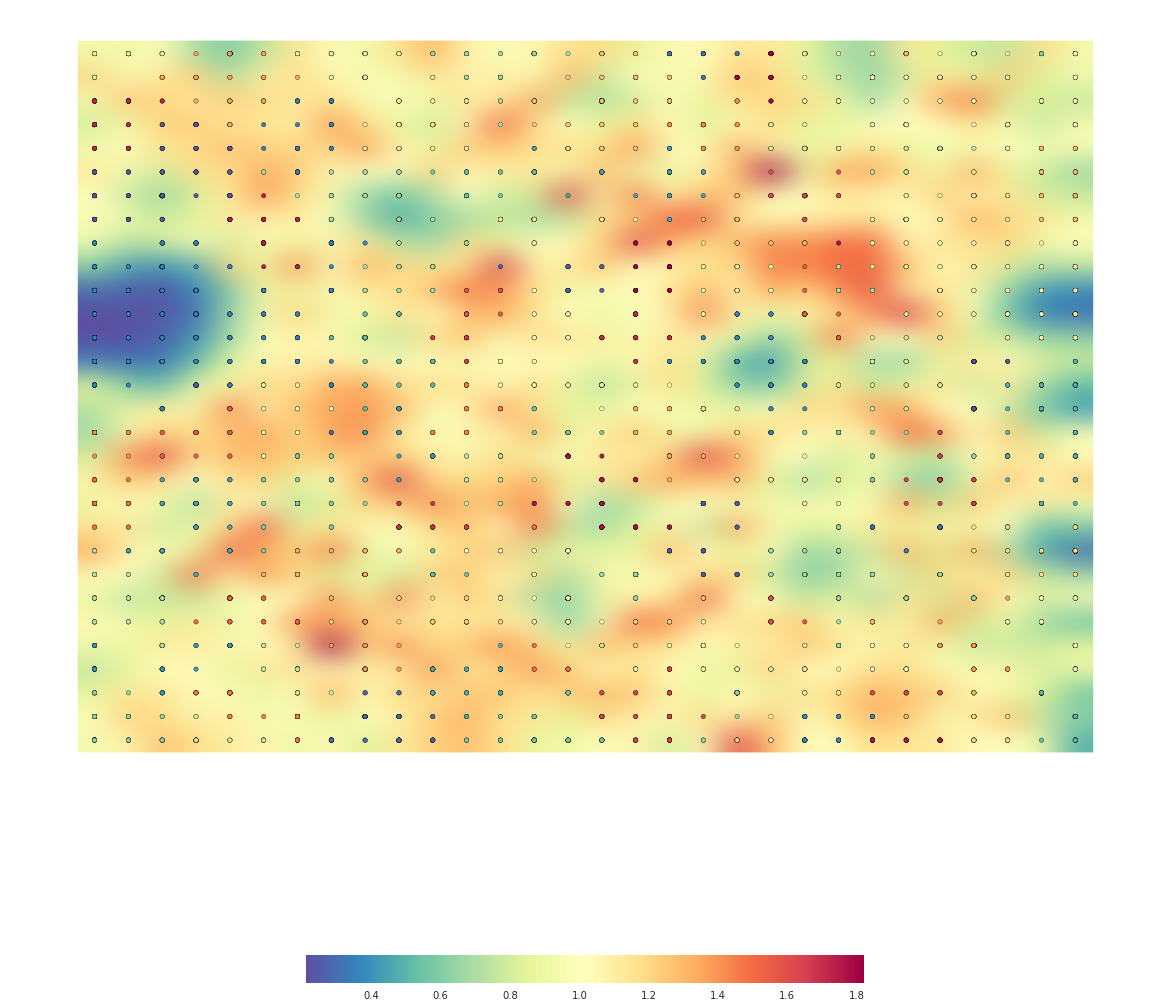

[39, 39, 39, 71, 71, 71, 40, 40, 40, 40, 29, 29, 29, 29, 29, 65, 65, 7, 7, 7, 98, 51, 51, 51, 67, 45, 45, 45, 25, 52]
[39, 39, 71, 71, 71, 71, 71, 40, 40, 40, 57, 29, 29, 29, 65, 65, 65, 65, 7, 98, 98, 51, 51, 51, 51, 45, 45, 45, 52, 52]
[93, 93, 93, 71, 71, 71, 8, 8, 40, 57, 57, 57, 29, 64, 65, 65, 65, 65, 74, 74, 98, 51, 51, 51, 51, 45, 45, 52, 52, 52]
[93, 93, 1, 1, 71, 8, 8, 8, 57, 57, 57, 57, 29, 64, 64, 65, 65, 74, 74, 74, 38, 38, 51, 51, 51, 33, 52, 52, 52, 52]
[93, 93, 1, 1, 1, 8, 8, 8, 57, 57, 57, 57, 21, 14, 64, 64, 65, 14, 74, 74, 38, 38, 38, 38, 33, 33, 33, 52, 67, 67]
[1, 1, 1, 1, 1, 30, 8, 30, 30, 30, 21, 21, 21, 21, 14, 14, 14, 14, 14, 86, 86, 86, 86, 33, 33, 33, 58, 67, 67, 67]
[1, 1, 1, 1, 1, 94, 30, 30, 30, 30, 30, 21, 21, 56, 14, 56, 14, 14, 14, 66, 86, 86, 86, 33, 41, 58, 58, 58, 67, 67]
[1, 1, 1, 9, 94, 94, 94, 30, 30, 30, 30, 21, 56, 56, 56, 56, 56, 14, 66, 66, 66, 86, 86, 41, 41, 41, 58, 58, 67, 67]
[9, 9, 9, 9, 9, 94, 94, 9, 9, 30, 30, 30, 56, 56, 3, 56, 99, 99,

In [64]:
map1.view_umatrix(bestmatches=True, figsize=(20, 20), colorbar=True)
a, i = np.unique(map1.clusters, return_counts=True)
a = np.argsort(i)
i = np.sort(i)

lst = map1.clusters.tolist()
for l in lst:
    print l
print '\n\n Clusters sorted by increasing number of neurons: \n Cluster index \n Number of neurons'
print np.asarray([a.tolist(), i.tolist()])

In [66]:
import operator

def prepare_cluster_stats(ind):
    x, y = map1.clusters.shape
    dick = dict()
    kappa = dict()
    for m in range(bmus.shape[0]):
        i = bmus[m][0]; j = bmus[m][1]
        if map1.clusters[i][j] not in dick.keys():
            dick[map1.clusters[i][j]] = dict()
        categ = categories[m].tolist()[0]
        for c in categ.strip().split(',  '):
            if c not in kappa.keys():
                kappa[c] = 1
            else:
                kappa[c] += 1
                
            if c not in dick[map1.clusters[i][j]].keys():
                dick[map1.clusters[i][j]][c] = 1
            else:
                dick[map1.clusters[i][j]][c] += 1

    stats = dick[ind]
    sorted_stats = list(reversed(sorted(stats.items(), key=operator.itemgetter(1))))
    print sorted_stats


## Ανάλυση SOM
Ο λόγος που σε μικρότερη διάσταση δεδομένα με μεγαλύτερη πυκνότητα πιθανότητας πιάνουν περισσότερους νευρώνες είναι ότι λόγω της μείωσης της διαστατικότητας αυξάνεται η πυκνότητα των δεδομένων στον χώρο, άρα και το πόσο κοντά βρίσκονται μεταξύ τους και κατ'επέκταση ο "κενός" χώρος που υπήρχε λόγω της αραιότητάς τους "κατοικείται" πλέον. Όπως φαίνεται το cluster 9, στον οποίο αντιστοιχούν πολλοί νευρώνες, πιάνει μεγαλύτερο χώρο στον χάρτη, ενώ αντίθετα το cluster 78 όχι.

In [72]:
prepare_cluster_stats(78)
prepare_cluster_stats(9)

[('"Horror"', 33), ('"Crime Fiction"', 1), ('"Animation"', 1), ('"Bollywood"', 1)]

[('"Romance Film"', 288), ('"Drama"', 198), ('"Romantic drama"', 134), ('"Comedy"', 108), ('"Romantic comedy"', 100), ('"Musical"', 43), ('"Indie"', 31), ('"Period piece"', 31), ('"Film adaptation"', 28), ('"World cinema"', 20), ('"Fantasy"', 18), ('"Comedy-drama"', 17), ('"Coming of age"', 11), ('"Crime Fiction"', 10), ('"Costume drama"', 10), ('"Black-and-white"', 10), ('"Thriller"', 9), ('"Family Drama"', 9), ('"Musical comedy"', 8), ('"Sports"', 7), ('"Mystery"', 7), ('"Action/Adventure"', 7), ('"War film"', 6), ('"Chinese Movies"', 6), ('"Teen"', 5), ('"Silent film"', 5), ('"Filipino Movies"', 5), ('"Television movie"', 5), ('"Family Film"', 5), ('"Music"', 4), ('"Comedy film"', 4), ('"Melodrama"', 4), ('"Slapstick"', 4), ('"Domestic Comedy"', 4), ('"Action"', 4), ('"Horror"', 3), ('"New Hollywood"', 3), ('"Dance"', 3), ('"Road movie"', 3), ('"Marriage Drama"', 3), ('"Workplace Comedy"', 3), ('"Mus

Ο λόγος που τα δεδομένα που βρίσκονται μακριά ή απομωνομένα στον χάρτη ασχέτως διαστατικότητας είναι ότι ο SOM σε αντίθεση με τον PCA προσπαθεί να διατηρήσει τις "γειτονιές" των δεδομένων καθώς μειώνει την διαστατικότητά τους, δηλαδή την ικανότητα διάκρισης μεταξύ τους και κατά πόσο αυτά μοιάζουν, δηλαδή οι ιδιοτιμές που διατηρεί είναι ιδιοτιμές με ικανότητα διάκρισης, ενώ ο PCA κρατάει ιδιοτιμές μεγάλης ενέργειας, κάτι που δεν βοηθάει απαραίτητα στην διάκριση των κλάσεων.

Όπως φαίνεται παρακάτω τα clusters 52, 26 μας δίνουν μεγάλους αριθμούς σε κατηγορίες που απέχουν νοηματικά μεταξύ τους αρκετά, και ομοίως απέχουν και στον χάρτη SOM, καθώς αποτελούν άκρα του διαμετρικά αντίθετα.

In [71]:
prepare_cluster_stats(52)
prepare_cluster_stats(26)

[('"Crime Fiction"', 86), ('"Thriller"', 82), ('"Crime Thriller"', 59), ('"Mystery"', 41), ('"Drama"', 39), ('"Action"', 18), ('"Black-and-white"', 16), ('"Detective"', 15), ('"World cinema"', 15), ('"Detective fiction"', 14), ('"Suspense"', 12), ('"Film noir"', 12), ('"Indie"', 8), ('"Gangster Film"', 8), ('"Comedy"', 8), ('"Adventure"', 6), ('"Psychological thriller"', 5), ('"Film adaptation"', 4), ('"Romance Film"', 4), ('"Heist"', 4), ('"Horror"', 3), ('"Crime Drama"', 3), ('"Whodunit"', 3), ('"Political thriller"', 3), ('"Buddy film"', 3), ('"Caper story"', 3), ('"Neo-noir"', 3), ('"Bollywood"', 2), ('"Chinese Movies"', 2), ('"Art film"', 2), ('"Action/Adventure"', 2), ('"War film"', 2), ('"Japanese Movies"', 2), ('"Comedy Thriller"', 2), ('"Political drama"', 2), ('"Courtroom Drama"', 2), ('"Chase Movie"', 2), ('"Master Criminal Films"', 1), ('"Fantasy"', 1), ('"Mockumentary"', 1), ('"Teen"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Road movie"', 1), ('"Marriage Drama"', 1)

Επίσης κοντινά πρότυπα εισόδου όπως φαίνεται από τις παρακάτω κατηγορίες τείνουν να βρίσκονται κοντά, καθώς και τα υποείδη τους Comedy-Drama με Drama. Αυτό γιατί ο SOM βρίσκει και την εννοιολογική ομοίοτητα, επομένως κατατάσσει τις ταινίες, και κατ'επέκταση τους νευρώνες και τα αντίστοιχα clusters τους, κοντά.

In [74]:
prepare_cluster_stats(9)
prepare_cluster_stats(75)

[('"Romance Film"', 288), ('"Drama"', 198), ('"Romantic drama"', 134), ('"Comedy"', 108), ('"Romantic comedy"', 100), ('"Musical"', 43), ('"Indie"', 31), ('"Period piece"', 31), ('"Film adaptation"', 28), ('"World cinema"', 20), ('"Fantasy"', 18), ('"Comedy-drama"', 17), ('"Coming of age"', 11), ('"Crime Fiction"', 10), ('"Costume drama"', 10), ('"Black-and-white"', 10), ('"Thriller"', 9), ('"Family Drama"', 9), ('"Musical comedy"', 8), ('"Sports"', 7), ('"Mystery"', 7), ('"Action/Adventure"', 7), ('"War film"', 6), ('"Chinese Movies"', 6), ('"Teen"', 5), ('"Silent film"', 5), ('"Filipino Movies"', 5), ('"Television movie"', 5), ('"Family Film"', 5), ('"Music"', 4), ('"Comedy film"', 4), ('"Melodrama"', 4), ('"Slapstick"', 4), ('"Domestic Comedy"', 4), ('"Action"', 4), ('"Horror"', 3), ('"New Hollywood"', 3), ('"Dance"', 3), ('"Road movie"', 3), ('"Marriage Drama"', 3), ('"Workplace Comedy"', 3), ('"Musical Drama"', 3), ('"Comedy of manners"', 3), ('"Bollywood"', 3), ('"Western"', 3), 

Όπως φαίνεται παρακάτω έννοιες που μπορεί να βρίσκονταν εννοιολογικά μακριά, σε κάποια σημεία του χάρτη τοποθετούνται κοντά. Αυτό πιθανώς οφείλεται στο γεγονός ότι τα χαρακτηριστικά ενός είδους μιας ταινίες δεν είναι ντετερμινιστικά προσδιορισμένα. Επομένως μπορεί να υπάρξουν ταινίες που ενώ φαίνεται μέσω της περίληψής τους να μοιάζουν, να ανήκουν σε διαφορετικές κατηγορίες. Επίσης λόγω της μείωσης της διαστατικότητας, χάνουμε κάποια πληροφορία και συγχέονται μερικές "ομάδες" δεδομένων. Επίσης, μπορεί να υπάρχουν και λανθασμένα labels στα δεδομένα.

In [75]:
prepare_cluster_stats(96)
prepare_cluster_stats(50)

[('"Horror"', 66), ('"Science Fiction"', 26), ('"Black-and-white"', 11), ('"Indie"', 6), ('"Thriller"', 5), ('"Film adaptation"', 4), ('"Drama"', 4), ('"Costume Horror"', 4), ('"Sci-Fi Horror"', 3), ('"Psychological thriller"', 2), ('"Monster movie"', 2), ('"Silent film"', 2), ('"Television movie"', 2), ('"Pre-Code"', 2), ('"Creature Film"', 2), ('"Suspense"', 2), ('"Alien Film"', 2), ('"Short Film"', 2), ('"Natural horror films"', 2), ('"Doomsday film"', 1), ('"Disaster"', 1), ('"Zombie Film"', 1), ('"Point of view shot"', 1), ('"B-movie"', 1), ('"Action"', 1), ('"Escape Film"', 1), ('"Master Criminal Films"', 1), ('"Apocalyptic and post-apocalyptic fiction"', 1), ('"Archaeology"', 1), ('"Adventure"', 1), ('"Supernatural"', 1), ('"Gothic Film"', 1), ('"History"', 1), ('"Monster"', 1), ('"Action/Adventure"', 1), ('"Comedy"', 1), ('"Music"', 1)]

[('"Comedy film"', 70), ('"Horror"', 38), ('"Musical"', 30), ('"Comedy"', 17), ('"Mystery"', 8), ('"Crime Fiction"', 5), ('"Chinese Movies"', 

## Ομάδα Α23
## Ξυπόλιτος Γεώργιος 03113629
## Πετρίδης Στέφανος 03113418
